In [1]:
# Tự động reload thư viện khi có thay đổi (không cần restart kernel)
%load_ext autoreload
%autoreload 2

## Dữ liệu SAT_GPA

In [ ]:
from vplearn.regression import KNN
from vplearn.metrics import MSE, MAE, R2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

# Trong notebook, dùng Path.cwd() thay cho __file__
base_dir = Path.cwd()
print(base_dir)

data_path = f"{base_dir}\\data\\SAT_GPA.csv"
df = pd.read_csv(data_path)
y = df['GPA']
x = df['SAT']

df.describe()

f:\Learning\ML\examples\02_KNN_and_Linear_Regression


,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


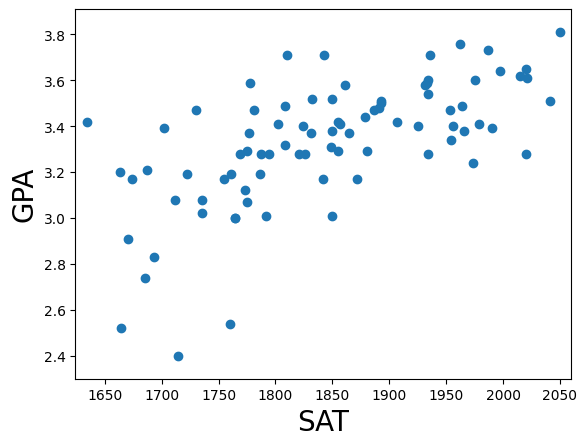

In [3]:
plt.scatter(x, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.ylim(y.min() - 0.1, y.max() + 0.1)
plt.xlim(x.min() - 10, x.max() + 10)
plt.show()

In [4]:
data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

knn = KNN()
knn.fit(X_train, Y_train, k = 8)
preds = knn.predict(X_test)

print(preds)

[3.3925  3.275   3.295   3.3975  3.295   3.3975  3.3975  3.25875 3.39
 3.3975  3.3875  3.3875  3.36625 3.3875  3.295   3.3975  3.30875 3.36625
 3.37625 3.3875 ]


In [5]:
mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

MSE(0.081378)
MAE(0.271188)
R2(-10.951519)


## Dữ liệu nhiệt độ sôi và áp suất khí quyển

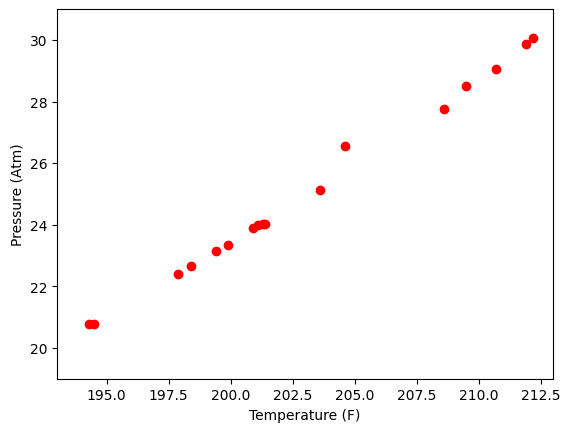

In [6]:
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [7]:
data_len = len(X)
X_train = np.array(x[:16])
Y_train = np.array(y[:16])
X_test = np.array(x[16:data_len])
Y_test = np.array(y[16:data_len])

knn = KNN()
knn.fit(X_train, Y_train, k = 4)
preds = knn.predict(X_test)
print(preds)
print(Y_test)

mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

[24.83]
[[30.06]]
MSE(27.352900)
MAE(5.230000)
R2(-inf)


F:\Learning\ML\vplearn\metrics\r2.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - ss_res / ss_tot


## Dữ liệu tiêu thụ nhiên liệu 

In [8]:
import math
import numpy as np

data_path = f"{base_dir}\\data\\fuel.txt"
with open(data_path) as f:
    lines = f.readlines()

    x_data = []
    y_data = []
    lines.pop(0)

    for line in lines:
        splitted = line.replace('\n', '').split(',')
        splitted.pop(0)
        splitted = list(map(float, splitted))
        fuel = 1000 * splitted[1] / splitted[5]
        dlic = 1000 * splitted[0] / splitted[5]
        logMiles = math.log2(splitted[3])
        y_data.append([fuel])
        x_data.append([splitted[-1], dlic, splitted[2], logMiles])

    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

In [9]:
data_len = len(x_data)
X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])
X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

knn = KNN()
knn.fit(X_train, Y_train, k = 6)
preds = knn.predict(X_test)
print(preds)
print(Y_test)

mse = MSE(Y_test, preds)
print(mse)
mae = MAE(Y_test, preds)
print(mae)
r2 = R2(Y_test, preds)
print(r2)

[655.90295124 638.45605803 638.45605803 611.92699102 655.90295124
 644.48982949 588.04446806 605.09984957 662.65313963 584.95242916
 644.48982949]
[[711.73305769]
 [697.05277706]
 [638.23106095]
 [681.10013659]
 [591.49994589]
 [691.02271186]
 [681.03112144]
 [576.06974956]
 [562.4109333 ]
 [581.79371695]
 [842.79175243]]
MSE(7675.602939)
MAE(29.487492)
R2(-12.828940)
